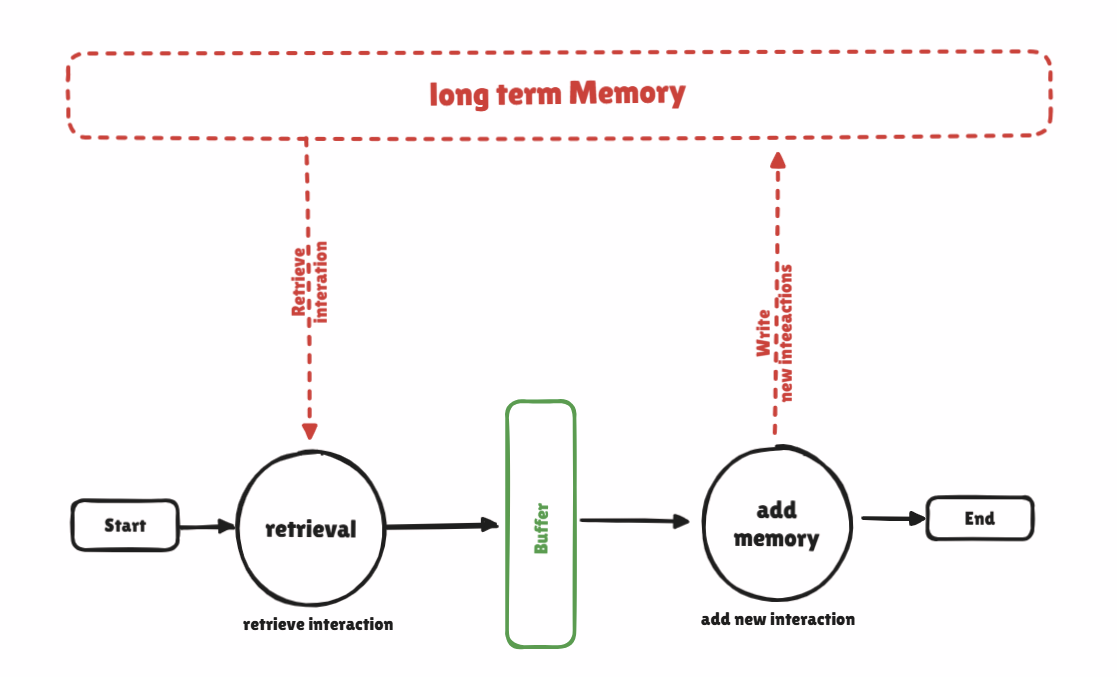

# memory init

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
import json
import os
from tqdm.notebook import tqdm, trange

from memory.memory_manager import MemoryManager, memory_initalize, set_memory
from simple_rag.rag_config import CHROMA_DB_PATH, BASE_URL, EMBEDDING_MODEL_NAME
from simple_rag.rag.run_rag import initialize_llm_client, run_simple_baseline

In [7]:
memory = MemoryManager(db_path=CHROMA_DB_PATH, embedding_model=EMBEDDING_MODEL_NAME, base_url=BASE_URL)
set_memory(memory)
llm_client = initialize_llm_client()

In [8]:
dir_path = "data/input/memory_init/memory_init"
files = os.listdir(dir_path)

for user in tqdm(files[3:6]):
    with open(f'{dir_path}/{user}', 'r') as f:
        data = []
        for l in f:
            data.append(json.loads(l))

    memory_initalize(data[0], chunk_type='persona')
    for i in trange(len(data)):
        memory_initalize(data[i], chunk_type='interaction')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
files[3:6]

['u_03.jsonl', 'u_06.jsonl', 'u_07.jsonl']

In [13]:
memory.get_chunk_by_id('u_04_00')

# Run

In [ ]:
user = 'u_01'
batch_size = 1
write_every_n_batches = 1

input_jsonl_path = f"data/input/memory_init/input/{user}.jsonl"
output_jsonl_path = f"data/output/{user}.jsonl"
progress_log_path = f"data/log{user}.txt"
memory_log_path: str = "data/memory_additions.txt"
debug=False

In [ ]:
run_simple_baseline(
    input_jsonl_path=input_jsonl_path,
    output_jsonl_path=output_jsonl_path,
    memory_instance=memory,
    llm_client=llm_client,
    batch_size=batch_size,
    progress_log_path=progress_log_path,
    memory_log_path=memory_log_path,
    debug=debug
)

Loading data from data/input/memory_init/input/u_01.jsonl...
Loaded 64 interactions
Created 64 batches of size 1


Processing batches:   0%|          | 0/64 [00:00<?, ?it/s]


Processing Batch 1/64 (1 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]



Phase 2: Adding to Memory...


Processing batches:   2%|▏         | 1/64 [00:03<03:10,  3.02s/it]

  ✓ Batch 1 memory additions completed (1/1 successful)
  📊 Batch 1 Stats:
      Average Predicted Rating: 4.50
      Average True Rating: 1.00
      Prediction Error (MAE): 3.50

Processing Batch 2/64 (1 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]



Phase 2: Adding to Memory...


Processing batches:   3%|▎         | 2/64 [00:06<03:06,  3.00s/it]

  ✓ Batch 2 memory additions completed (1/1 successful)
  📊 Batch 2 Stats:
      Average Predicted Rating: 4.00
      Average True Rating: 4.00
      Prediction Error (MAE): 0.00

Processing Batch 3/64 (1 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]



Phase 2: Adding to Memory...


Processing batches:   5%|▍         | 3/64 [00:09<03:08,  3.09s/it]

  ✓ Batch 3 memory additions completed (1/1 successful)
  📊 Batch 3 Stats:
      Average Predicted Rating: 4.00
      Average True Rating: 1.00
      Prediction Error (MAE): 3.00

Processing Batch 4/64 (1 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]



Phase 2: Adding to Memory...


Processing batches:   6%|▋         | 4/64 [00:12<03:14,  3.24s/it]

  ✓ Batch 4 memory additions completed (1/1 successful)
  📊 Batch 4 Stats:
      Average Predicted Rating: 4.00
      Average True Rating: 4.00
      Prediction Error (MAE): 0.00

Processing Batch 5/64 (1 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]



Phase 2: Adding to Memory...


Processing batches:   8%|▊         | 5/64 [00:15<03:00,  3.06s/it]

  ✓ Batch 5 memory additions completed (1/1 successful)
  📊 Batch 5 Stats:
      Average Predicted Rating: 4.00
      Average True Rating: 4.00
      Prediction Error (MAE): 0.00
💾 Writing intermediate results to data/output/u_01.jsonl...

Processing Batch 6/64 (1 interactions)
Phase 1: Simple Prediction...


Processing batches:   8%|▊         | 5/64 [00:17<03:31,  3.58s/it]


KeyboardInterrupt: 

# Visualizaion

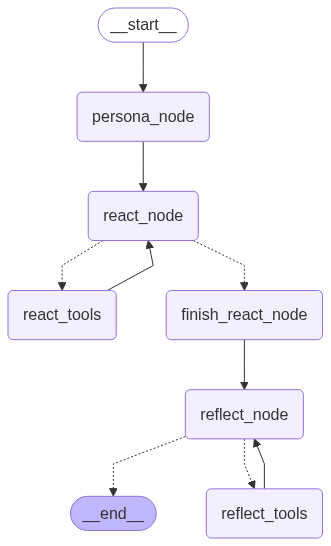

In [ ]:
# from agent.old.graph_agent import visualize_graph, build_graph
# graph = build_graph()
# visualize_graph(graph)

![image.png](attachment:image.png)

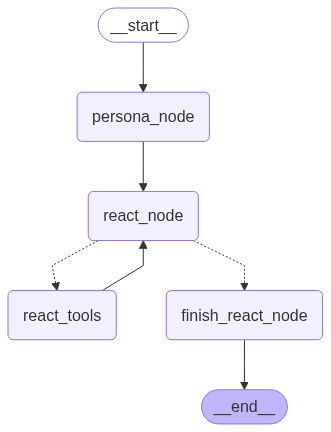

In [ ]:
# from agent.react_agent import build_react_graph, visualize_graph
# react_agent = build_react_graph()
# visualize_graph(react_agent)

![image.png](attachment:image.png)

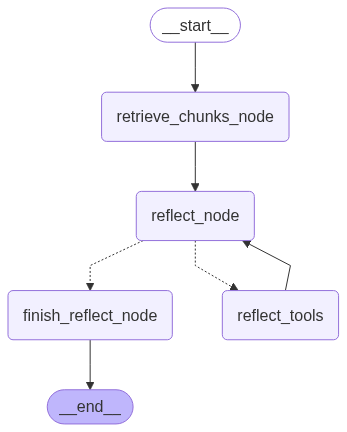

In [ ]:
# from agent.reflect_agent import build_reflect_graph, visualize_graph
# reflect_agent = build_reflect_graph()
# visualize_graph(reflect_agent)

![image-2.png](attachment:image-2.png)